In [1]:
from typing import List, TypedDict
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name : str
    values : List
    operation : str
    result : str

In [3]:
def do_task(state : AgentState) -> AgentState:
    res = 1
    if state["operation"] == "+":
        res = sum(state["values"])
    else:
        for num in state["values"]:
            res *= num
    
    state["result"] = f"Hey {state['name']}, your result is : {res}"
    return state       


In [5]:
graph = StateGraph(AgentState)

graph.add_node("task", do_task)
graph.set_entry_point("task")
graph.set_finish_point("task")
app = graph.compile()

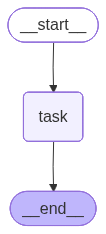

In [6]:
app

In [10]:
app.invoke({"name" : "sudeep", "values" : [1,2,3,4], "operation" : "*"})

{'name': 'sudeep',
 'values': [1, 2, 3, 4],
 'operation': '*',
 'result': 'Hey sudeep, your result is : 24'}

In [11]:
app.invoke({"name" : "sudeep", "values" : [1,2,3,4], "operation" : "+"})

{'name': 'sudeep',
 'values': [1, 2, 3, 4],
 'operation': '+',
 'result': 'Hey sudeep, your result is : 10'}